In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [92]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
model = linear_model.LinearRegression()

In [93]:
x = df['Chirps/Second']
y = df['Ground Temperature']
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [94]:
model.fit(x,y)

LinearRegression()

In [95]:
model.coef_

array([[3.410323]])

In [45]:
model.intercept_

array([22.84898231])

In [96]:
print("The linear Equation is:")
print(f"y = {model.coef_}*X + {model.intercept_}")

The linear Equation is:
y = [[3.410323]]*X + [22.84898231]


In [97]:
y_pred = model.predict(x)
print(y_pred)

[[91.0554423]
 [77.4141503]
 [90.3733777]
 [85.5989255]
 [81.1655056]
 [75.7089888]
 [72.9807304]
 [76.3910534]
 [75.3679565]
 [78.4372472]
 [74.0038273]
 [81.5065379]
 [77.4141503]
 [80.8244733]
 [71.9576335]]


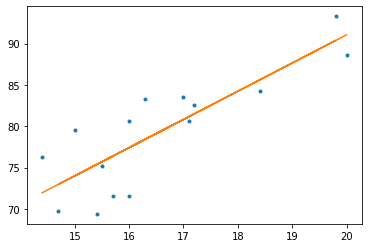

In [43]:
plt.plot(df['Chirps/Second'],df['Ground Temperature'],'.')
plt.plot(x,y_pred)

In [101]:
from sklearn.metrics import r2_score
print(f"r2 score of the reg line: {r2_score(y,y_pred)}")
print(model.score(x,y))

r2 score of the reg line: 0.6922946529147003
0.6922946529147003


In [78]:
L=[]
for i in range(20,25):
    L.append(model.predict([[i]]))
    
print(*L)

[[91.0554423]] [[94.4657653]] [[97.8760883]] [[101.2864113]] [[104.6967343]]


In [ ]:
'''By this result we can interpret that when temperature is close to 95
chirp/seconds is close to 21'''

In [77]:
print(f"The ground temp when there was 18 chirp/second: {model.predict([[18]])}")

The ground temp when there was 18 chirp/second: [[84.2347963]]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [79]:
df = pd.read_fwf("G:\Others\Data Science - TYPE A\Guvi\Assignment\Task 6\\brain_body.txt")

In [81]:
df.head(3)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1


In [84]:
x = np.array(df['Brain']).reshape(-1,1)
y = np.array(df['Body']).reshape(-1,1)

In [85]:
model.fit(x,y)

LinearRegression()

In [86]:
y_pred = model.predict(x)

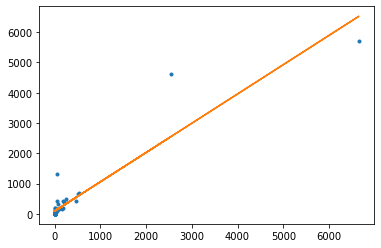

In [87]:
plt.plot(x,y,'.')
plt.plot(x,y_pred)

In [89]:
model.score(y,y_pred)

0.8536290611370146

In [102]:
print("Has Strong corelation")

Has Strong corelation


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
df = pd.read_fwf("G:\Others\Data Science - TYPE A\Guvi\Assignment\Task 6\\salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
x=df.drop(columns=['Salary'])
y=df['Salary']

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
from sklearn.metrics import r2_score

In [20]:
for i in x.columns:
    feature = np.array(df[i]).reshape(-1,1)
    model.fit(feature,y)
    y_pred = model.predict(feature)
    score = r2_score(y,y_pred)
    print(f"The r2score for {i} column is {score}")

The r2score for Sex column is 0.06389892583288004
The r2score for Rank column is 0.7525360539274631
The r2score for Year column is 0.49093702676921624
The r2score for Degree column is 0.004861680984748484
The r2score for YSdeg column is 0.45542813458360276


In [32]:
df.groupby(df['Sex']).mean()

,Rank,Year,Degree,YSdeg,Salary
Sex,,,,,
0,2.157895,8.736842,0.631579,16.657895,24696.789474
1,1.714286,4.071429,0.714286,14.642857,21357.142857


In [ ]:
'''1. The column that gives best r2 score is 'Rank' column.
2. Rank colums is highly related (positively) with the salary,
hence the most important colums.
3. Sex does not seem to be a lone factor in salary as the salary
is strongly dependent on the rank and years of service in the 
field.
'''